# Law School Ranking Analysis

This is an analysis of law school rankings comparing the [Leiter Law School reports for 2017](http://leiterlawschool.typepad.com/leiter/2017/11/the-top-40-us-law-faculties-in-terms-of-scholarly-excellence-2017-edition.html) to the [2017 US News Ranking of Law Schools](https://www.usnews.com/best-graduate-schools/top-law-schools/law-rankings)

**The goal is to discover whether the two rankings are highly or poorly correlated.**

(I performed this analysis at the request of Emory Law school professor (and my father) [Michael Broyde](http://law.emory.edu/faculty-and-scholarship/faculty-profiles/broyde-profile.html))

In [9]:

#!/usr/bin/python

#Import standard modules, note that most of these modules are not used in this analysis
import sqlite3
from bs4 import BeautifulSoup
from IPython.display import display
import re
import sys
import math
import os
import optparse
import json
import time
import matplotlib.pylab as plt
import requests
import pandas as pandas
import numpy
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
import scipy

import sklearn
import pickle
import random
import math
import seaborn
import statistics
import nltk

#Read in the data
df=pandas.read_table("/Users/joshuabroyde/Projects/Law_School_rankings/Law_school_rankings_input.txt")


### This is what the data frame looks looks like, column 1 is the school name, column 2 is Leiter ranking, and column 3 is the US-news ranking. 

Caveats:
While Lieter ranks only 40 schools, US News ranks more than 100. In this analysis, I only analyze the 40 ranked by both. 

Note also that NS News has many ties, while Lieter's rankings has no ties.

In [8]:
df

,School Name,Lieter,US-News
0,Yale University,1,1
1,Harvard,2,3
2,University of Chicago,3,4
3,New York University,4,6
4,Stanford University,5,2
5,Columbia University,6,5
6,University of California (Berkeley),7,12
7,University of Pennsylvania,8,7
8,University of Virginia,9,8
9,University of Michigan,10,8


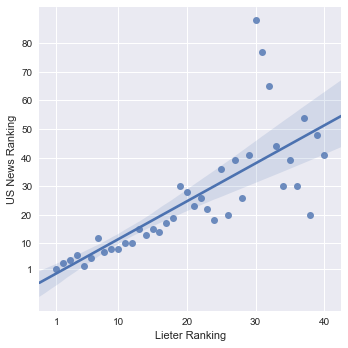

In [6]:
#Plot the two rankings
seaborn.set(font_scale=1)
ax=seaborn.lmplot(x ='Lieter', y = 'US-News',data=df,fit_reg=True)
ax.set(xlabel='Lieter Ranking', ylabel='US News Ranking')
seaborn.set(font_scale=1)
plt.xticks([1,10,20,30,40])
plt.yticks([1,10,20,30,40,50,60,70,80])
#plt.show()
plt.savefig('Law_School_Rankings.pdf')
plt.show()

In the above plot each dot is a law school, the x axis is the ranking using Lieter's method, and the Y axis is the ranking using US News Ranking. The blue line is the regression line. The two rankings appear highly correlated, especially for the first 30 schools. 

Now get the strength of the correlation, using simply pearson correlation

In [18]:
correlation=scipy.stats.pearsonr(df["Lieter"],df["US-News"])
#Get the R squared
display(correlation[0]**2)
#Get the pvalue
display(correlation[1])

0.58449801122160772

9.3598957950041242e-09

## Conclusion

The Lieter and US News Rankings are highly correlated, with an R squared of .58 (p-value < .001). Visually inspecting the graph, we can especially see that for schools highly ranked in one method, they are likely to be highly ranked by another method.